# Центральная предельная теорема

В этом задании вам предстоит проверить работу центральной предельной теоремы, а также поработать с генерацией случайных чисел и построением графиков в Питоне.

Выберите ваше любимое непрерывное распределение (чем меньше оно будет похоже на нормальное, тем интереснее; попробуйте выбрать какое-нибудь распределение из тех, что мы не обсуждали в курсе). Сгенерируйте из него выборку объёма 1000, постройте гистограмму выборки и нарисуйте поверх неё теоретическую плотность распределения вашей случайной величины (чтобы величины были в одном масштабе, не забудьте выставить у гистограммы значение параметра normed=True).

Ваша задача — оценить распределение выборочного среднего вашей случайной величины при разных объёмах выборок. Для этого при трёх и более значениях n (например, 5, 10, 50) сгенерируйте 1000 выборок объёма n и постройте гистограммы распределений их выборочных средних. Используя информацию о среднем и дисперсии исходного распределения (её можно без труда найти в википедии), посчитайте значения параметров нормальных распределений, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних. Обратите внимание: для подсчёта значений этих параметров нужно использовать именно теоретические среднее и дисперсию вашей случайной величины, а не их выборочные оценки. Поверх каждой гистограммы нарисуйте плотность соответствующего нормального распределения (будьте внимательны с параметрами функции, она принимает на вход не дисперсию, а стандартное отклонение).

Опишите разницу между полученными распределениями при различных значениях n. Как меняется точность аппроксимации распределения выборочных средних нормальным с ростом n?

In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

# Распределение Лапласа

или двойное экспоненциальное распределение имеет функцию плотности распределения:

f(x) = 1/(2b)*e^(-|x-a|/b), x - беск.

https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5_%D0%9B%D0%B0%D0%BF%D0%BB%D0%B0%D1%81%D0%B0


https://docs.scipy.org/doc/scipy-1.2.1/reference/generated/scipy.stats.laplace.html#scipy.stats.laplace

Сгенерируйте из распредленния выборку объёма 1000

In [255]:
laplace = sts.laplace(loc=2,scale=1)
sample=laplace.rvs(size=1000) # Generate random numbers 


In [256]:
x = np.linspace(-5,5,100) # выборка из 100 элементов в интервале -5 до + 5

постройте гистограмму выборки и нарисуйте поверх неё теоретическую плотность распределения вашей случайной величины (чтобы величины были в одном масштабе, не забудьте выставить у гистограммы значение параметра normed=True) 
p.s.  в последнем питоне вместо normed - density

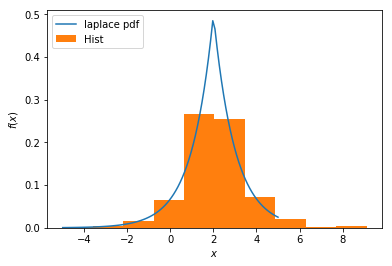

In [258]:
pdf = laplace.pdf(x) # PDF, так как строим плотность 
plt.plot(x, pdf,  label='laplace pdf')
plt.hist(sample, density=True, label='Hist')
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.legend(loc='upper left')

при значениях n (например, 5, 10, 50) сгенерируйте 1000 выборок объёма n и постройте гистограммы распределений их выборочных средних.


Для этого - создадим список средних выборочных (используем метод mean() для 1000 сгенерированных выборок

In [263]:
n=5

In [264]:
lst=[]
for i in range(1000):
    lst.append(laplace.rvs(n).mean())

In [270]:
normal=sts.norm.pdf(x,loc=2, scale=np.sqrt((2/1**2)/n)) 
# плоность нормального распределения для инрервала x, мат ожид , равному коэф сдвига, и ср. кв. отклонения (коэф. массштаба)
# см. вики 


Text(0.5, 1.0, '5 значений')

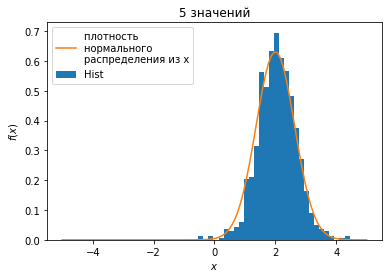

In [266]:
plt.hist(lst, density=True, bins=30, label='Hist') # гистограмма с n значениями
plt.plot(x, normal, label='плотность \nнормального \nраспределения из x')
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.legend(loc='upper left')
plt.title("{} значений".format(n))



сразу видно  нормальное расспределение и соответсвтие ЦПТ. увеличим число возможных значений до 10, а потом до 30

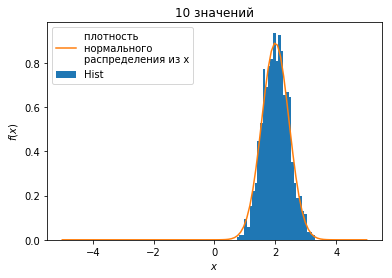

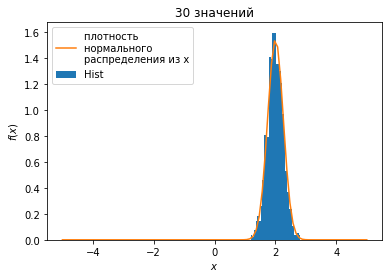

In [272]:
dct=[10,30]
for n in dct:
    lst=[]
    for j in range(1000):
        lst.append(laplace.rvs(n).mean())
    normal=sts.norm.pdf(x,loc=2, scale=np.sqrt((2/1**2)/n))     
    plt.hist(lst, density=True, bins=30, label='Hist') # гистограмма с n значениями
    plt.plot(x, normal, label='плотность \nнормального \nраспределения из x')
    plt.ylabel('$f(x)$')
    plt.xlabel('$x$')
    plt.legend(loc='upper left')
    plt.title("{} значений".format(n))    
    plt.show()   
        
        
        
        
        
        

Распределение Лапласа полностью соответствует ЦПТ

In [275]:
import math

In [279]:
math.exp(-3)

0.049787068367863944